In [1]:
from ase import Atoms as atom
from ase.io import read,write
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q_xyz = read('keep-fit-TiO2-electro-md/fit-TiO2-electro-mp0-q1-md/q-sparse-md_water-T-600.0.xyz')

In [3]:
ixyz = [q_xyz]

In [4]:
symbols = ixyz[0].get_chemical_symbols()

nframe = len(ixyz)
H_zpositions = []
O_zpositions = []
Na_zpositions = []
Cl_zpositions = []
Ti_zpositions = []

H_q = []
O_q = []
Na_q = []
Cl_q = []
Ti_q = []

for t in ixyz:
    t.wrap()
    qs = q_xyz.arrays['q'] / 9.43
    H_zpositions.append(t.get_positions()[[ i for i,s in enumerate(symbols) if s=='H'],2])
    O_zpositions.append(t.get_positions()[[ i for i,s in enumerate(symbols) if s=='O'],2])
    Na_zpositions.append(t.get_positions()[[ i for i,s in enumerate(symbols) if s=='Na'],2])
    Cl_zpositions.append(t.get_positions()[[ i for i,s in enumerate(symbols) if s=='Cl'],2])
    Ti_zpositions.append(t.get_positions()[[ i for i,s in enumerate(symbols) if s=='Ti'],2])
    
    H_q.append(qs[ [i for i,s in enumerate(symbols) if s=='H']])
    O_q.append(qs[ [i for i,s in enumerate(symbols) if s=='O']])
    Na_q.append(qs[ [i for i,s in enumerate(symbols) if s=='Na']])
    Cl_q.append(qs[ [i for i,s in enumerate(symbols) if s=='Cl']])
    Ti_q.append(qs[ [i for i,s in enumerate(symbols) if s=='Ti']])

In [5]:
H_q = np.array(H_q).flatten()
O_q = np.array(O_q).flatten()
Na_q = np.array(Na_q).flatten()
Cl_q = np.array(Cl_q).flatten()
Ti_q = np.array(Ti_q).flatten()

In [6]:
H_zpositions = np.array(H_zpositions).flatten()
O_zpositions = np.array(O_zpositions).flatten()
Na_zpositions = np.array(Na_zpositions).flatten()
Cl_zpositions = np.array(Cl_zpositions).flatten()
Ti_zpositions = np.array(Ti_zpositions).flatten()

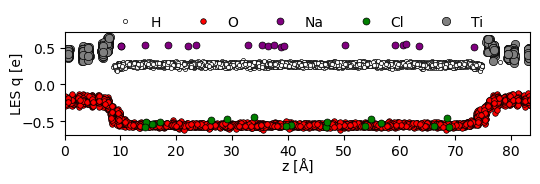

In [23]:
fig, ax = plt.subplots(figsize=(5.5, 2.)) 

ax.plot(H_zpositions, H_q, 'o', c='white',markeredgecolor='k', markeredgewidth=0.5, ms=3, label='H')
ax.plot(O_zpositions, O_q, 'o', c='red',markeredgecolor='k', markeredgewidth=0.5, ms=4, label='O')
ax.plot(Na_zpositions, Na_q, 'o', c='purple',markeredgecolor='k', markeredgewidth=0.5, ms=5, label='Na')
ax.plot(Cl_zpositions, Cl_q, 'o', c='green',markeredgecolor='k', markeredgewidth=0.5, ms=5, label='Cl')
ax.plot(Ti_zpositions, Ti_q, 'o', c='gray',markeredgecolor='k', markeredgewidth=0.5, ms=6, label='Ti')

ax.legend(ncol=5, bbox_to_anchor=(0.5,1.1),loc='center', frameon=False)

ax.set_xlabel('z [$\mathrm{\AA}$]', labelpad=-2)
ax.set_ylabel('LES q [e]', labelpad=-2)

ax.set_xlim([0, 83.394157])

plt.tight_layout()
plt.show()

fig.savefig('ion-q.pdf', dpi=300)

In [8]:
sys_list = ['mp0-sr', 'mp0-q1', 'mp1-sr', 'mp1-q1']

In [9]:
sys_name_dict={'mp0-sr':'SR', 
               'mp0-q1':'LR', 
               'mp1-sr':'MP1 SR', 
               'mp1-q1':'MP1 LR',
              }

In [10]:
Na_den_list = {}
Cl_den_list = {}

In [11]:
dir_now = './keep-fit-TiO2-electro-md/fit-TiO2-electro-'
for sys in sys_list:
    Na_den_list[sys] = np.genfromtxt(dir_now+sys+'/Na_moldensity_profile.dat')
    Cl_den_list[sys] = np.genfromtxt(dir_now+sys+'/Cl_moldensity_profile.dat')

In [12]:
# 1 a.m.u. = 1.67377 x 10-27 kilogram
amu_2_kg = 1.67377*10**(-27)
invA3_2_L = 10**(27)
amuinvA3_kgm3 = amu_2_kg*invA3_2_L

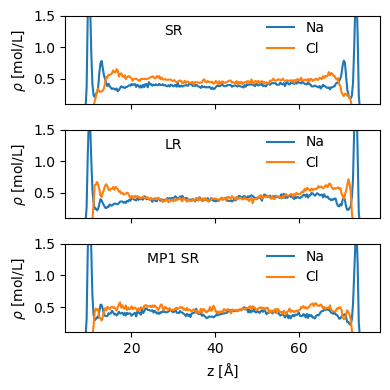

In [17]:
# Plot results
fig, ax = plt.subplots(3, 1, figsize=(4., 4), sharex=True, sharey=True)  # 2x2 grid
ax = ax.flatten()  # Flatten the axes array for easier indexing

for i, sys in enumerate(sys_list[:3]):
    ax[i].plot(Na_den_list[sys][:, 0], Na_den_list[sys][:, 1], label='Na')
    ax[i].plot(Cl_den_list[sys][:, 0], Cl_den_list[sys][:, 1], label='Cl')

    # Uncomment if needed:
    # ax[i].vlines(pt_min, 0, 0.5, color='k')
    # ax[i].vlines(pt_max, 0, 0.5, color='k')

    ax[i].text(30, 1.2, sys_name_dict[sys],ha='center')

    ax[i].set_ylim([0.1, 1.5])
    ax[i].legend(loc='best', frameon=False, bbox_to_anchor=(0.6,0.4))

    ax[i].set_ylabel(r'$\rho$ [mol/L]')

# Hide unused subplots if sys_list has fewer than 4 systems
for j in range(len(sys_list), 4):
    fig.delaxes(ax[j])

ax[-1].set_xlabel('z [$\mathrm{\AA}$]')

plt.tight_layout()
plt.show()

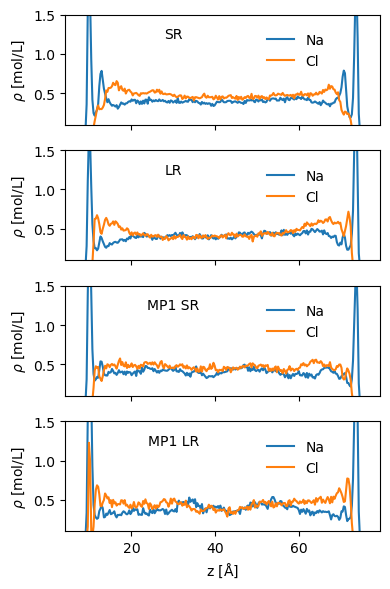

In [13]:
# Plot results
fig, ax = plt.subplots(4, 1, figsize=(4., 6), sharex=True, sharey=True)  # 2x2 grid
ax = ax.flatten()  # Flatten the axes array for easier indexing

for i, sys in enumerate(sys_list):
    ax[i].plot(Na_den_list[sys][:, 0], Na_den_list[sys][:, 1], label='Na')
    ax[i].plot(Cl_den_list[sys][:, 0], Cl_den_list[sys][:, 1], label='Cl')

    # Uncomment if needed:
    # ax[i].vlines(pt_min, 0, 0.5, color='k')
    # ax[i].vlines(pt_max, 0, 0.5, color='k')

    ax[i].text(30, 1.2, sys_name_dict[sys],ha='center')

    ax[i].set_ylim([0.1, 1.5])
    ax[i].legend(loc='best', frameon=False, bbox_to_anchor=(0.6,0.4))

    ax[i].set_ylabel(r'$\rho$ [mol/L]')

# Hide unused subplots if sys_list has fewer than 4 systems
for j in range(len(sys_list), 4):
    fig.delaxes(ax[j])

ax[-1].set_xlabel('z [$\mathrm{\AA}$]')

plt.tight_layout()
plt.show()


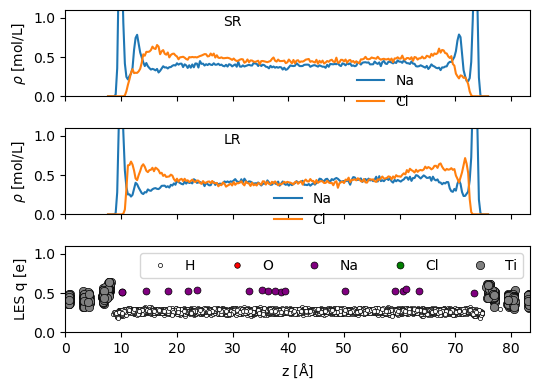

In [14]:
# Plot results
fig, ax = plt.subplots(3, 1, figsize=(5.5, 4.), sharex=True, sharey=True)  # 2x2 grid
ax = ax.flatten()  # Flatten the axes array for easier indexing

for i, sys in enumerate(sys_list[:2]):
    ax[i].plot(Na_den_list[sys][:, 0], Na_den_list[sys][:, 1], label='Na')
    ax[i].plot(Cl_den_list[sys][:, 0], Cl_den_list[sys][:, 1], label='Cl')

    # Uncomment if needed:
    # ax[i].vlines(pt_min, 0, 0.5, color='k')
    # ax[i].vlines(pt_max, 0, 0.5, color='k')

    ax[i].text(30, 0.9, sys_name_dict[sys],ha='center')

    ax[i].set_ylim([0, 1.1])
    ax[i].set_xlim([0, 83.394157])
    ax[i].legend(loc='best', frameon=False, bbox_to_anchor=(0.6,0.4))

    ax[i].set_ylabel(r'$\rho$ [mol/L]')



#ax[-1].set_xlabel('z [$\mathrm{\AA}$]')

axi = ax[2]

axi.plot(H_zpositions, H_q, 'o', c='white',markeredgecolor='k', markeredgewidth=0.5, ms=3, label='H')
axi.plot(O_zpositions, O_q, 'o', c='red',markeredgecolor='k', markeredgewidth=0.5, ms=4, label='O')
axi.plot(Na_zpositions, Na_q, 'o', c='purple',markeredgecolor='k', markeredgewidth=0.5, ms=5, label='Na')
axi.plot(Cl_zpositions, Cl_q, 'o', c='green',markeredgecolor='k', markeredgewidth=0.5, ms=5, label='Cl')
axi.plot(Ti_zpositions, Ti_q, 'o', c='gray',markeredgecolor='k', markeredgewidth=0.5, ms=6, label='Ti')

axi.legend(ncol=5)

axi.set_xlabel('z [$\mathrm{\AA}$]')
axi.set_ylabel('LES q [e]')


plt.tight_layout()
plt.show()


fig.savefig('ion-density.pdf', dpi=300)


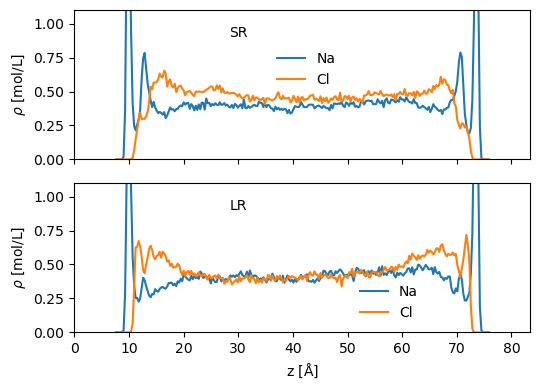

In [15]:
# Plot results
fig, ax = plt.subplots(2, 1, figsize=(5.5, 4.), sharex=True, sharey=True)  # 2x2 grid
ax = ax.flatten()  # Flatten the axes array for easier indexing

for i, sys in enumerate(sys_list[:2]):
    ax[i].plot(Na_den_list[sys][:, 0], Na_den_list[sys][:, 1], label='Na')
    ax[i].plot(Cl_den_list[sys][:, 0], Cl_den_list[sys][:, 1], label='Cl')

    # Uncomment if needed:
    # ax[i].vlines(pt_min, 0, 0.5, color='k')
    # ax[i].vlines(pt_max, 0, 0.5, color='k')

    ax[i].text(30, 0.9, sys_name_dict[sys],ha='center')

    ax[i].set_ylim([0, 1.1])
    ax[i].set_xlim([0, 83.394157])
    ax[i].legend(loc='best', frameon=False, bbox_to_anchor=(0.6,0.4))

    ax[i].set_ylabel(r'$\rho$ [mol/L]')



ax[-1].set_xlabel('z [$\mathrm{\AA}$]')




plt.tight_layout()
plt.show()


fig.savefig('ion-density.pdf', dpi=300)


In [18]:
lz = 83.394157

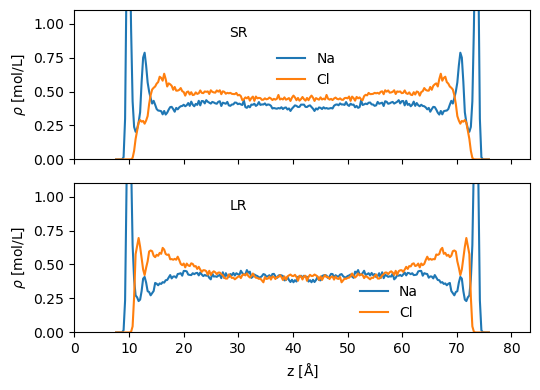

In [22]:
# Plot results
fig, ax = plt.subplots(2, 1, figsize=(5.5, 4.), sharex=True, sharey=True)  # 2x2 grid
ax = ax.flatten()  # Flatten the axes array for easier indexing

for i, sys in enumerate(sys_list[:2]):
    
    ax[i].plot(Na_den_list[sys][:, 0], 
               (Na_den_list[sys][:, 1] + Na_den_list[sys][::-1, 1])/2, 
               label='Na')
    
    ax[i].plot(Cl_den_list[sys][:, 0], 
               (Cl_den_list[sys][:, 1] + Cl_den_list[sys][::-1, 1])/2, 
               label='Cl')

    # Uncomment if needed:
    # ax[i].vlines(pt_min, 0, 0.5, color='k')
    # ax[i].vlines(pt_max, 0, 0.5, color='k')

    ax[i].text(30, 0.9, sys_name_dict[sys],ha='center')

    ax[i].set_ylim([0, 1.1])
    ax[i].set_xlim([0, 83.394157])
    ax[i].legend(loc='best', frameon=False, bbox_to_anchor=(0.6,0.4))

    ax[i].set_ylabel(r'$\rho$ [mol/L]')



ax[-1].set_xlabel('z [$\mathrm{\AA}$]')




plt.tight_layout()
plt.show()


fig.savefig('ion-density.pdf', dpi=300)
